In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
# Generating data
np.random.seed(0)
X1 = np.random.uniform(size=10000)
X2 = 3.5*np.random.uniform(size = 10000) - 2.5
y1 = np.log(X1 + 0.1)
y2 = np.power(X2, 3) + 2*np.power(X2, 2) - X2 - 2

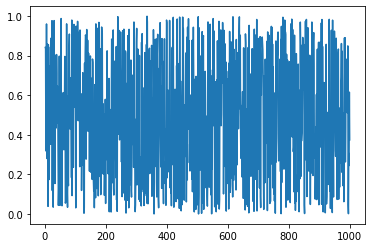

In [4]:
# Random testing
x = np.random.uniform(size = 1000)
y = np.arange(1, 1001)
plt.plot(y, x)
plt.show()

Part b.1

In [4]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, y1, test_size = 0.3, shuffle = True)
X_val1, X_test1, Y_val1, Y_test1 = train_test_split(X_test1, Y_test1, test_size = 0.5, shuffle = True)

In [5]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size = 0.3, shuffle = True)
X_val2, X_test2, Y_val2, Y_test2 = train_test_split(X_test2, Y_test2, test_size = 0.5, shuffle = True)

In [9]:
# Creating the dataset module
class Data(Dataset):
 
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
 
    def __len__(self):
        return len(self.data)
 
    def __getitem__(self, idx):
        
        # Converting to torch tensors
        point = torch.tensor(self.data[idx])
        label = torch.tensor(self.labels[idx])

        return point, label

In [10]:
# Creating instances of the dataset module
train_dataset1 = Data(X_train1, Y_train1)
val_dataset1 = Data(X_val1, Y_val1)
test_dataset1 = Data(X_test1, Y_test1)

In [12]:
# Creating instances of the dataset module
train_dataset2 = Data(X_train2, Y_train2)
val_dataset2 = Data(X_val2, Y_val2)
test_dataset2 = Data(X_test2, Y_test2)

In [13]:
# Creating DataLoader objects
train_loader1 = DataLoader(train_dataset1, batch_size = 16, shuffle = True, drop_last = True)
val_loader1 = DataLoader(val_dataset1, batch_size = 16, shuffle = True, drop_last = True)
test_loader1 = DataLoader(test_dataset1, batch_size = 16, shuffle = True, drop_last = True)

In [14]:
# Creating DataLoader objects
train_loader2 = DataLoader(train_dataset2, batch_size = 16, shuffle = True, drop_last = True)
val_loader2 = DataLoader(val_dataset2, batch_size = 16, shuffle = True, drop_last = True)
test_loader2 = DataLoader(test_dataset2, batch_size = 16, shuffle = True, drop_last = True)

In [ ]:
class XOR_Model(nn.Module):
 
    def __init__(self, hidden_size):
 
        super().__init__()
 
        self.fc1 = nn.Linear(2, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
 
    def forward(self, x):
 
        x = F.relu(self.fc1(x))
        out = torch.sigmoid(self.fc2(x))
 
        return out